In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

In [2]:
df = pd.read_csv('../Data/Advertising.csv', index_col=0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


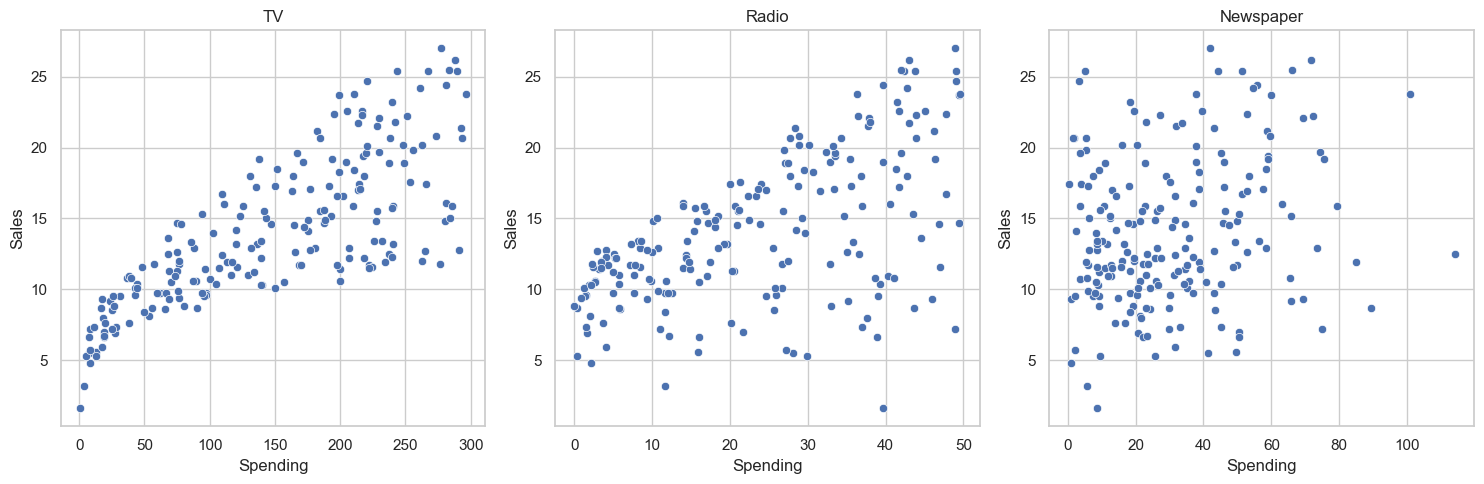

In [4]:
number_features = df.shape[1] - 1
fig, ax = plt.subplots(1, number_features, figsize=(15, 5))

for i, feature in enumerate(df.columns[:-1]):
    sns.scatterplot(data = df, x=feature, y='Sales', ax=ax[i])
    ax[i].set(xlabel='Spending', title=f'{feature}')

fig.tight_layout()

/Users/asajad/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/asajad/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/asajad/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/asajad/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

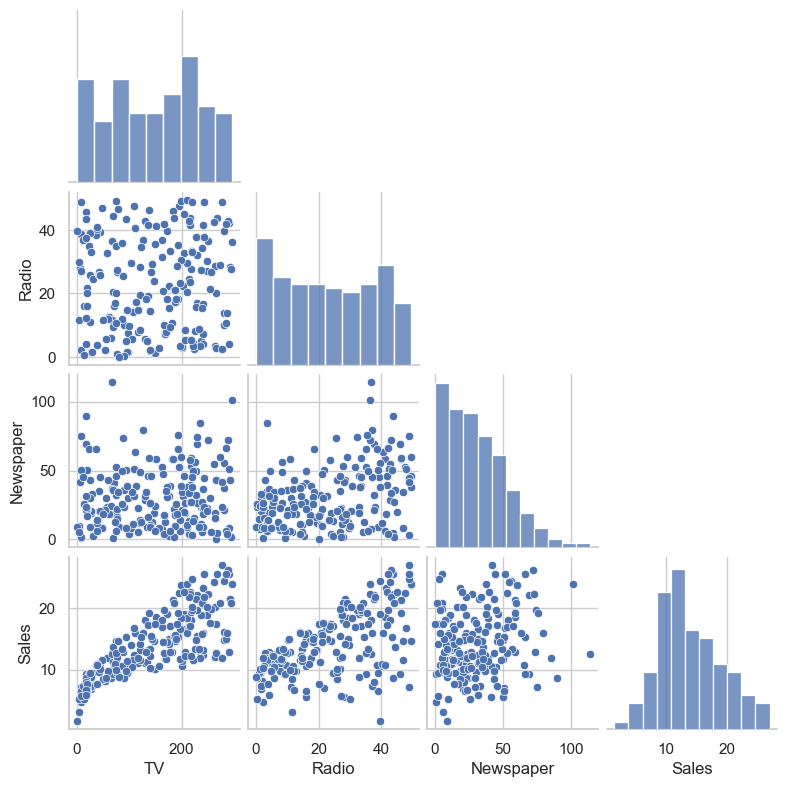

In [5]:
ax = sns.pairplot(df, corner=True, height=2)

Intercept beta_0 hat: 7.0326
Slope beta_1 hat: 0.0475


/Users/asajad/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/asajad/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, 'Tv advertisement linear regression'),
 Text(0.5, 0, 'Thousands dollars'),
 Text(0, 0.5, 'Sales thousands units')]

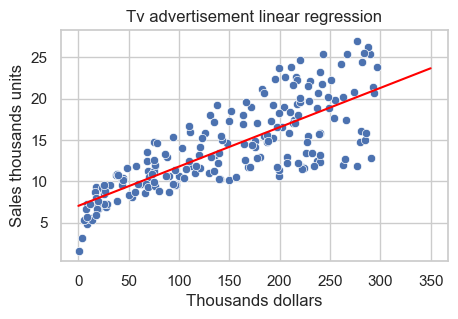

In [6]:
X , y = df["TV"], df["Sales"]
beta_1, beta_0 = np.polyfit(X, y, deg=1)    # Linear regression

y_hat = lambda x: beta_0 + beta_1 * x
print(f"Intercept beta_0 hat: {beta_0:.4f}")
print(f"Slope beta_1 hat: {beta_1:.4f}")

spend = np.linspace(0, 350)

fig, ax = plt.figure(figsize=(5, 3), dpi=100), plt.axes()

sns.scatterplot(data = df, x='TV', y='Sales')
sns.lineplot(x=spend, y=y_hat(spend), color='red')

ax.set(
    title="Tv advertisement linear regression",
    xlabel="Thousands dollars",
    ylabel="Sales thousands units"
)

<Axes: xlabel='TV', ylabel='Sales'>

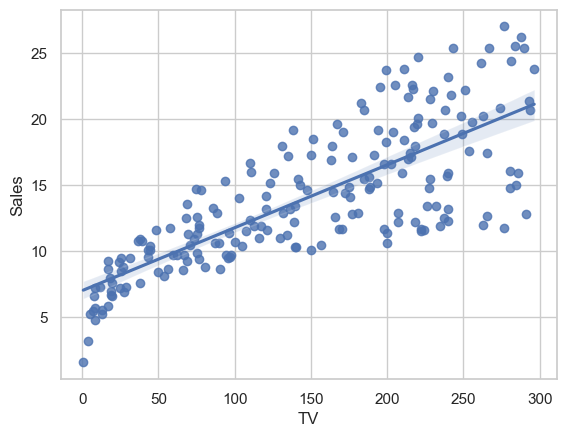

In [7]:
sns.regplot(x=X, y=y)

In [11]:
X, y = df.drop("Sales", axis="columns"), df["Sales"]
X.insert(0, "Intercept", 1)

regression_fit = lambda X, y: np.linalg.pinv(X.T @ X) @ X.T @ y
beta_hat = regression_fit(X, y)

predict = lambda x, beta: np.dot(x, beta)
test_sample = [1, 230.1, 37.8, 69.2]

y_hat = predict(test_sample, beta_hat)

print(
    f"Tv: $230.1k, Radio: $37.8k, Newspaper: $69.2k predicts {y_hat:.1f} thousand units"
)

Tv: $230.1k, Radio: $37.8k, Newspaper: $69.2k predicts 20.5 thousand units


In [12]:
train_fraction = int(len(df) * 0.7)

train = df.sample(n=train_fraction, random_state=42, replace=False)
test = df.drop(train.index)

X_train, y_train = (
    train.drop("Sales", axis="columns"),
    train["Sales"]
)

X_test, y_test = test.drop("Sales", axis="columns"), test["Sales"]

X_train.insert(0, "Intercept", 1)
X_test.insert(0, "Intercept", 1)

for dataset in ["X_train", "X_test", "y_train", "y_test"]:
    print(f"Shape of {dataset}: {eval(dataset).shape}")

Shape of X_train: (140, 4)
Shape of X_test: (60, 4)
Shape of y_train: (140,)
Shape of y_test: (60,)


In [13]:
beta_hat = regression_fit(X_train, y_train)
print(f"Regression coefficients beta: {beta_hat.values}")

predict = lambda X, weights: X @ weights

y_hat = predict(X_test.to_numpy(), np.reshape(beta_hat.to_numpy(), (4, 1)))

print(f"Shape of y_hat is {y_hat.shape}, i.e. prediction for each sample in test set")

print(f"Tv, Radio, Newspaper spending of {X_test.iloc[0].values[1:]} gives prediction of {y_hat[0][0]:.1f} thousand units")
print(f"The true sale label is y = {y_test.iloc[0]} thousand units")

Regression coefficients beta: [ 2.95609427  0.04679253  0.18706314 -0.00480492]
Shape of y_hat is (60, 1), i.e. prediction for each sample in test set
Tv, Radio, Newspaper spending of [44.5 39.3 45.1] gives prediction of 12.2 thousand units
The true sale label is y = 10.4 thousand units


In [15]:
m = len(y_test)
y_hat = np.reshape(y_hat, (m))

MAE = 1 / m * np.sum(np.abs(y_test - y_hat))
MSE = 1 / m * np.sum((y_test - y_hat) ** 2)
RMSE = np.sqrt(MSE)

for metric in [
    ("Mean Absolute Error", "MAE", "k units"),
    ("Mean Squared Error", "MSE", "M units"),
    ("Root Mean Squared Error", "RMSE", "k units")
]:
    print(f"{metric[0]}: {eval(metric[1]):.2f}{metric[2]}")

Mean Absolute Error: 1.32k units
Mean Squared Error: 3.54M units
Root Mean Squared Error: 1.88k units
